In [22]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

### Data Loading

In [23]:
device = 'iPhone_7p'

In [24]:
def loadpce(result_dir):
    pce0 = pd.read_csv(result_dir+'PCE0.csv',header=None)[0]
    
    pce1_1 = pd.read_csv(result_dir+'PCE1_device1.csv',header=None)
    pce1_2 = pd.read_csv(result_dir+'PCE1_device2.csv',header=None)
    pce1 =  pd.concat([pce1_1, pce1_2], axis=0)[0]
    
    return pce0, pce1

In [25]:
result_dir = "./output_noise/%s/result/" % device
mat_result_dir = "./matlab_noise/%s/result/" % device

pce0, pce1 = loadpce(result_dir)
mat_pce0, mat_pce1 = loadpce(mat_result_dir)

### CoHist

In [26]:
def cohist(pce0, pce1, mat_pce0, mat_pce1, figname='cohist.png'):
    plt.figure(21)
    bins = np.linspace(-10, 400, 100)

    plt.subplot(211)
    plt.hist(pce0, bins, label='pce0')
    plt.hist(pce1, bins, label='pce1')
    plt.legend(loc='upper right')

    plt.subplot(212)
    plt.hist(mat_pce0, bins, label='mat_pce0')
    plt.hist(mat_pce1, bins, label='mat_pce0')
    plt.legend(loc='upper right')
    plt.savefig(result_dir + figname)

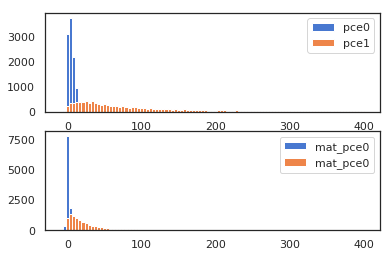

In [27]:
cohist(pce0, pce1, mat_pce0, mat_pce1)

### Data: join to df

In [28]:
a = list(zip(pce0,pce1,mat_pce0,mat_pce1))
remain = len(pce1)-len(pce0)
remained1 = pce0[remain:]
remained2 = mat_pce0[remain:]
remained = np.c_[remained1,remained2]
mylist = []

for i in a:
    mydict = {}
    mydict['pce0']=i[0]
    mydict['pce1']=i[1]
    mydict['mat_pce0']=i[2]
    mydict['mat_pce1']=i[3]
    mylist.append(mydict)
for i in remained:
    mydict = {}
    mydict['pce0']=i[0]
    mydict['mat_pce0']=i[1]
    mylist.append(mydict)

import pandas as pd
df = pd.DataFrame(mylist)
print(df)

           mat_pce0  mat_pce1          pce0     pce1
0      6.064300e-01    3.9029  7.231000e+00   32.512
1     -2.959000e-01    8.7252  6.905700e+00   26.856
2      2.490300e-01   12.9640  1.189700e+01   68.537
3      1.836400e+00   62.0350  1.401300e+01  203.380
4      4.384500e-01   17.3660  9.568700e+00   78.233
5      6.515300e-01    5.1053  4.149100e+00   34.570
6      1.552600e+00    4.5503  6.065600e+00   49.473
7      4.754100e+00   28.9880  6.993300e+00   71.043
8      4.908500e-03   25.6290  4.388300e+00  131.950
9      8.695100e-01   21.6940  2.391000e+00   93.983
10     2.528000e+00   14.1880  1.386000e+01   68.452
11     5.419900e-03   14.4880  3.862600e+00   61.402
12    -3.584800e+00   18.1960  9.361300e+00   67.735
13     5.971400e-01   35.4090  1.510200e+01   95.579
14     3.861000e+00   10.5920  8.751400e+00   26.582
15     3.090600e-01   24.6440  9.127600e+00   75.132
16    -9.853400e-01   13.5350  5.848000e+00   62.339
17     1.770900e+00   39.5070  1.243000e+01  1

### CoBox

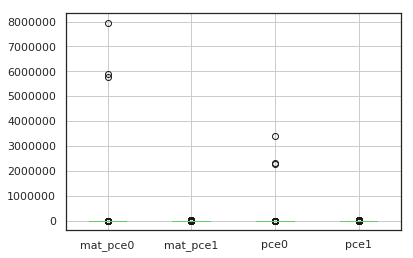

In [29]:
df.plot.box(grid=True)
plt.savefig(result_dir+'cobox.png')

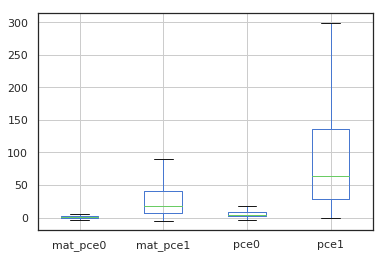

In [34]:
df.boxplot(showfliers=False)
plt.savefig(result_dir+'cobox_without_outliers.png')  # showfliers：是否显示异常值

### Pce1_Hist

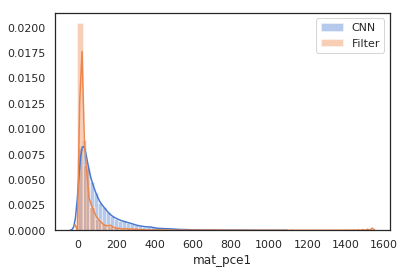

In [30]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
# sns.distplot(pce0)
# sns.distplot(mat_pce0)
sns.distplot(df['pce1'].dropna(),label='CNN')
sns.distplot(df['mat_pce1'].dropna(),label='Filter')
plt.legend(loc='upper right')
plt.savefig(result_dir + 'pce1_hist.png')

### ROC Curve

In [53]:
def pce_roc(pce0, pce1, mat_pce0=None, mat_pce1=None, figname=None):
    from sklearn.metrics import roc_curve, auc
    
    def single_pce_roc(pce0, pce1, tag):
        scores = np.r_[pce0,pce1]
        y = np.r_[np.zeros(len(pce0)),np.ones(len(pce1))]
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)

        roc_auc = auc(fpr,tpr) ###计算auc的值
        plt.plot(fpr, tpr, lw=lw, label='%s (AUC = %0.2f)' % (tag, roc_auc))
        
    plt.figure()
    plt.figure(figsize=(10,10))
    lw = 2
    
    single_pce_roc(pce0, pce1, 'CNN')
    single_pce_roc(mat_pce0, mat_pce1, 'Filter')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.005])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    if figname:
        plt.savefig(result_dir + figname)
    plt.show()

<Figure size 432x288 with 0 Axes>

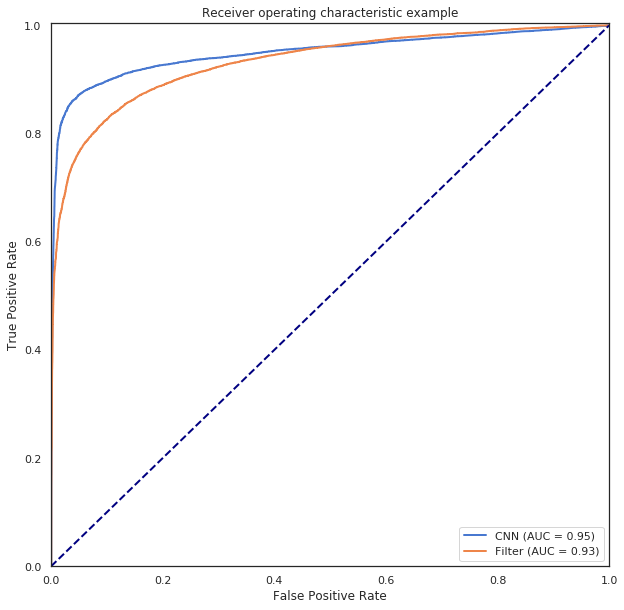

In [54]:
# pce_roc(pce0, pce1)
# pce_roc(mat_pce0, mat_pce1)
pce_roc(pce0, pce1, mat_pce0, mat_pce1)